In [2]:
################## Skip first part. The first part genrates audio data

In [3]:
#Go to the command line that says" ################3 Read code from here after you downloaded the data

##Go to the command line that says" ################ Read code from here after you downloaded the data

In [4]:
!pip install -q pydub

In [5]:
# Create individual folders for each piano and guitar sample
import os
import numpy as np
from scipy.io import wavfile

In [6]:
# First, let's create parent directories
!mkdir -p audio_samples

# Function to generate piano notes
def create_piano_tone(freq, duration=1.0, sr=16000):
    t = np.linspace(0, duration, int(sr * duration), False)
    # Piano-like tone with harmonics and decay
    tone = np.sin(2 * np.pi * freq * t) * np.exp(-t * 5)
    tone += 0.5 * np.sin(2 * np.pi * freq * 2 * t) * np.exp(-t * 7)
    tone += 0.25 * np.sin(2 * np.pi * freq * 3 * t) * np.exp(-t * 9)
    return tone / np.max(np.abs(tone)) * 0.9

# Function to generate guitar notes
def create_guitar_tone(freq, duration=1.0, sr=16000):
    t = np.linspace(0, duration, int(sr * duration), False)
    # Guitar-like tone with harmonics and slower decay
    tone = np.sin(2 * np.pi * freq * t) * np.exp(-t * 3)
    tone += 0.7 * np.sin(2 * np.pi * freq * 2 * t) * np.exp(-t * 4)
    tone += 0.5 * np.sin(2 * np.pi * freq * 3 * t) * np.exp(-t * 5)
    return tone / np.max(np.abs(tone)) * 0.9

In [7]:
# Piano notes (different frequencies across the keyboard range)
piano_freqs = [
    261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00,
    415.30, 440.00, 466.16, 493.88, 523.25, 554.37, 587.33
]

# Guitar notes (slightly lower range)
guitar_freqs = [
    82.41, 87.31, 92.50, 98.00, 103.83, 110.00, 116.54, 123.47,
    130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185.00
]


In [8]:
# Create and save piano samples in individual folders
for i, freq in enumerate(piano_freqs):
    # Create a folder for this specific piano sample
    folder_name = f"audio_samples/piano_{i+1}"
    os.makedirs(folder_name, exist_ok=True)

    # Add some randomness to make each sample unique
    duration = np.random.uniform(0.8, 1.5)
    attack = np.random.uniform(4, 6)
    tone = create_piano_tone(freq, duration=duration)

    # Save the file in its dedicated folder
    filename = f"{folder_name}/piano_{i+1}.wav"
    wavfile.write(filename, 16000, (tone * 32767).astype(np.int16))
    print(f"Created {filename}")

# Create and save guitar samples in individual folders
for i, freq in enumerate(guitar_freqs):
    # Create a folder for this specific guitar sample
    folder_name = f"audio_samples/guitar_{i+1}"
    os.makedirs(folder_name, exist_ok=True)

    # Add some randomness for variety
    duration = np.random.uniform(1.0, 2.0)
    decay = np.random.uniform(2.5, 3.5)
    tone = create_guitar_tone(freq, duration=duration)

    # Save the file in its dedicated folder
    filename = f"{folder_name}/guitar_{i+1}.wav"
    wavfile.write(filename, 16000, (tone * 32767).astype(np.int16))
    print(f"Created {filename}")

# List the created directories
!find audio_samples -type d | sort

Created audio_samples/piano_1/piano_1.wav
Created audio_samples/piano_2/piano_2.wav
Created audio_samples/piano_3/piano_3.wav
Created audio_samples/piano_4/piano_4.wav
Created audio_samples/piano_5/piano_5.wav
Created audio_samples/piano_6/piano_6.wav
Created audio_samples/piano_7/piano_7.wav
Created audio_samples/piano_8/piano_8.wav
Created audio_samples/piano_9/piano_9.wav
Created audio_samples/piano_10/piano_10.wav
Created audio_samples/piano_11/piano_11.wav
Created audio_samples/piano_12/piano_12.wav
Created audio_samples/piano_13/piano_13.wav
Created audio_samples/piano_14/piano_14.wav
Created audio_samples/piano_15/piano_15.wav
Created audio_samples/guitar_1/guitar_1.wav
Created audio_samples/guitar_2/guitar_2.wav
Created audio_samples/guitar_3/guitar_3.wav
Created audio_samples/guitar_4/guitar_4.wav
Created audio_samples/guitar_5/guitar_5.wav
Created audio_samples/guitar_6/guitar_6.wav
Created audio_samples/guitar_7/guitar_7.wav
Created audio_samples/guitar_8/guitar_8.wav
Create

In [9]:
##########3 download and save the files

from google.colab import files
!zip -r audio_samples.zip audio_samples/
files.download('audio_samples.zip')

  adding: audio_samples/ (stored 0%)
  adding: audio_samples/piano_15/ (stored 0%)
  adding: audio_samples/piano_15/piano_15.wav (deflated 11%)
  adding: audio_samples/guitar_15/ (stored 0%)
  adding: audio_samples/guitar_15/guitar_15.wav (deflated 23%)
  adding: audio_samples/piano_2/ (stored 0%)
  adding: audio_samples/piano_2/piano_2.wav (deflated 13%)
  adding: audio_samples/guitar_11/ (stored 0%)
  adding: audio_samples/guitar_11/guitar_11.wav (deflated 14%)
  adding: audio_samples/guitar_2/ (stored 0%)
  adding: audio_samples/guitar_2/guitar_2.wav (deflated 26%)
  adding: audio_samples/piano_10/ (stored 0%)
  adding: audio_samples/piano_10/piano_10.wav (deflated 10%)
  adding: audio_samples/piano_12/ (stored 0%)
  adding: audio_samples/piano_12/piano_12.wav (deflated 18%)
  adding: audio_samples/guitar_12/ (stored 0%)
  adding: audio_samples/guitar_12/guitar_12.wav (deflated 21%)
  adding: audio_samples/guitar_5/ (stored 0%)
  adding: audio_samples/guitar_5/guitar_5.wav (deflated

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
################3 Read code from here after you downloaded the data

In [11]:
import os
import zipfile
from google.colab import files

In [12]:
# Step 1: Upload the zip file
print("Please upload your zip file containing piano and guitar audio files.")
uploaded = files.upload()  # This will prompt you to select and upload a file

Please upload your zip file containing piano and guitar audio files.


Saving audio_samples.zip to audio_samples (1).zip


In [13]:
# Get the filename of the uploaded zip file
zip_filename = list(uploaded.keys())[0]
print(f"Uploaded: {zip_filename}")

# Step 2: Extract the zip file
extract_path = './extracted_audio'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to {extract_path}")

# Step 3: List all WAV files
all_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            all_files.append(file_path)

print(f"Found {len(all_files)} WAV files")

# Step 4: Categorize the files into piano and guitar
piano_files = []
guitar_files = []

for file_path in all_files:
    # Try to categorize based on file path
    is_piano = "piano" in file_path.lower()
    is_guitar = "guitar" in file_path.lower()

    # If can't determine automatically, ask the user
    if not (is_piano or is_guitar):
        print(f"File: {file_path}")
        response = input(f"Is this a piano (p) or guitar (g) file? ")
        is_piano = response.lower() == 'p'
        is_guitar = response.lower() == 'g'

    if is_piano:
        piano_files.append(file_path)
    elif is_guitar:
        guitar_files.append(file_path)
    else:
        print(f"Skipping {file_path} - unable to determine instrument type")

print(f"Piano files: {len(piano_files)}")
print(f"Guitar files: {len(guitar_files)}")

Uploaded: audio_samples (1).zip
Files extracted to ./extracted_audio
Found 30 WAV files
Piano files: 15
Guitar files: 15


In [14]:
# Step 5: Create directories for piano and guitar files
piano_dir = './piano_files'
guitar_dir = './guitar_files'
os.makedirs(piano_dir, exist_ok=True)
os.makedirs(guitar_dir, exist_ok=True)

# Function to copy files to their respective directories
def copy_file(src, dst_dir):
    filename = os.path.basename(src)
    dst = os.path.join(dst_dir, filename)
    # Read source file
    with open(src, 'rb') as f_in:
        content = f_in.read()
    # Write to destination
    with open(dst, 'wb') as f_out:
        f_out.write(content)
    return True

# Copy piano files
print(f"\nOrganizing {len(piano_files)} piano files...")
for file in piano_files:
    copy_file(file, piano_dir)

# Copy guitar files
print(f"\nOrganizing {len(guitar_files)} guitar files...")
for file in guitar_files:
    copy_file(file, guitar_dir)

print(f"\nPiano files organized in: {piano_dir}")
print(f"Guitar files organized in: {guitar_dir}")

# List the organized files to confirm
piano_organized = os.listdir(piano_dir)
guitar_organized = os.listdir(guitar_dir)

print(f"\nPiano folder contains {len(piano_organized)} files")
print(f"Guitar folder contains {len(guitar_organized)} files")

# Optional: Display the first few files from each folder
if piano_organized:
    print("\nSample piano files:")
    for file in piano_organized[:5]:
        print(f"- {file}")

if guitar_organized:
    print("\nSample guitar files:")
    for file in guitar_organized[:5]:
        print(f"- {file}")


Organizing 15 piano files...

Organizing 15 guitar files...

Piano files organized in: ./piano_files
Guitar files organized in: ./guitar_files

Piano folder contains 15 files
Guitar folder contains 15 files

Sample piano files:
- piano_1.wav
- piano_15.wav
- piano_11.wav
- piano_9.wav
- piano_12.wav

Sample guitar files:
- guitar_5.wav
- guitar_2.wav
- guitar_6.wav
- guitar_13.wav
- guitar_12.wav


In [17]:
# Import necessary libraries
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Processing piano files...
Piano file: piano_1.wav, Length: 0.95 seconds
Piano file: piano_15.wav, Length: 0.96 seconds
Piano file: piano_11.wav, Length: 1.06 seconds
Piano file: piano_9.wav, Length: 1.14 seconds
Piano file: piano_12.wav, Length: 1.37 seconds
Piano file: piano_3.wav, Length: 1.50 seconds
Piano file: piano_6.wav, Length: 1.32 seconds
Piano file: piano_8.wav, Length: 1.13 seconds
Piano file: piano_13.wav, Length: 1.01 seconds
Piano file: piano_2.wav, Length: 1.08 seconds
Piano file: piano_10.wav, Length: 0.96 seconds
Piano file: piano_5.wav, Length: 1.36 seconds
Piano file: piano_14.wav, Length: 1.02 seconds
Piano file: piano_7.wav, Length: 0.86 seconds
Piano file: piano_4.wav, Length: 1.28 seconds

Processing guitar files...
Guitar file: guitar_5.wav, Length: 1.04 seconds
Guitar file: guitar_2.wav, Length: 1.95 seconds
Guitar file: guitar_6.wav, Length: 1.67 seconds
Guitar file: guitar_13.wav, Length: 1.59 seconds
Guitar file: guitar_12.wav, Length: 1.49 seconds
Guitar f

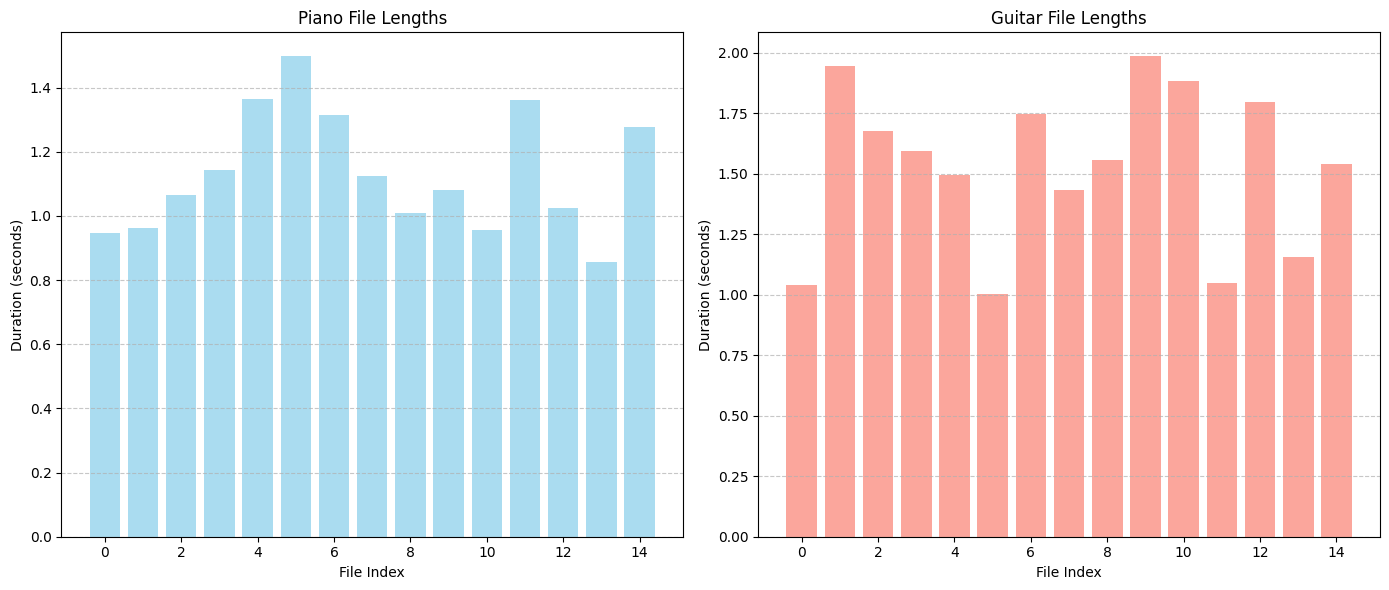

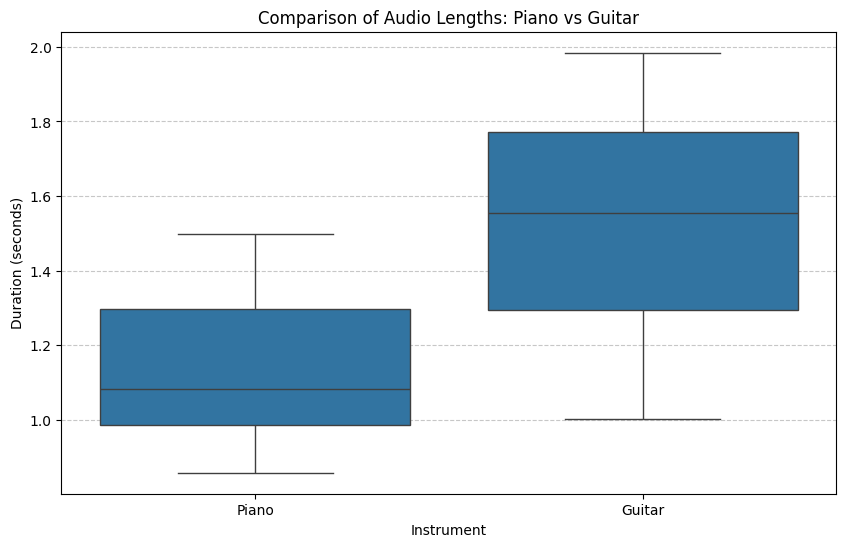

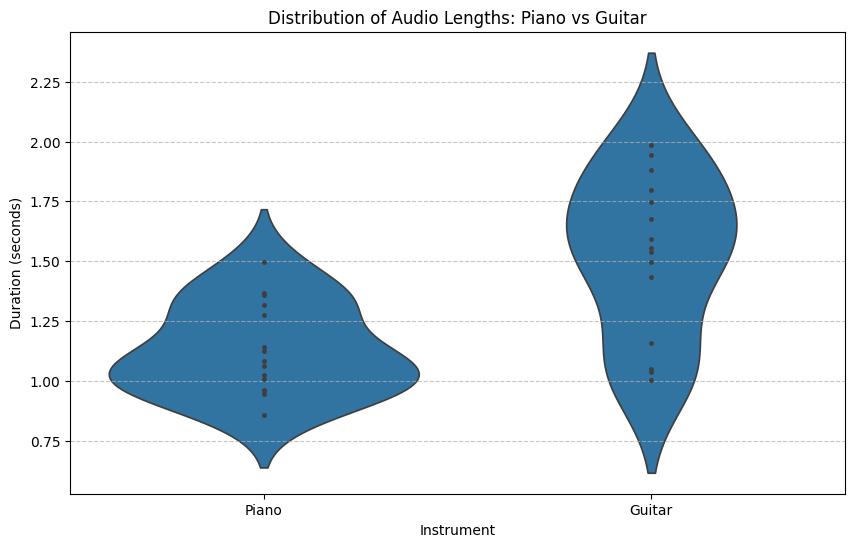

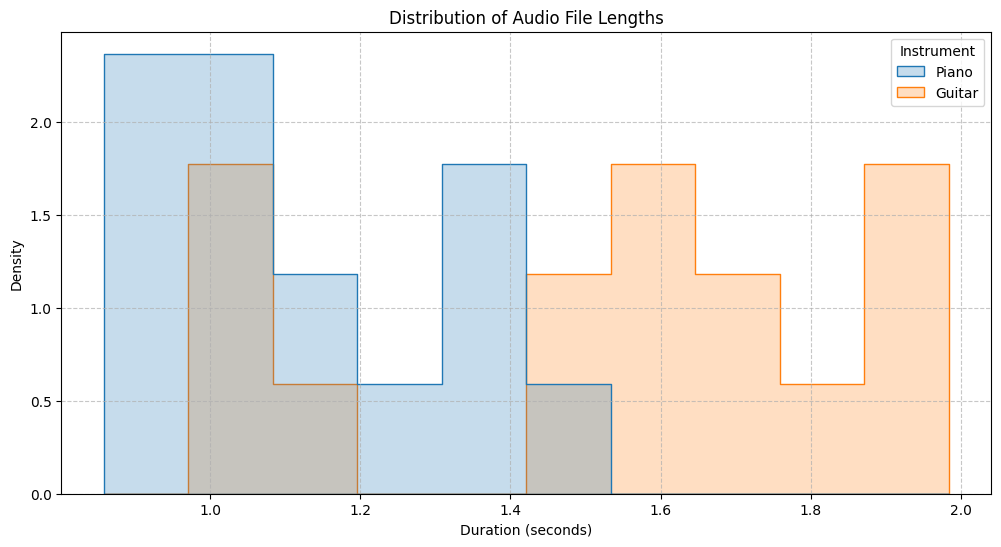


Detailed file length information:
     Filename  Duration (seconds) Instrument
guitar_10.wav            1.003062     Guitar
 guitar_5.wav            1.038938     Guitar
 guitar_4.wav            1.048312     Guitar
 guitar_3.wav            1.157437     Guitar
guitar_11.wav            1.432625     Guitar
guitar_12.wav            1.494875     Guitar
 guitar_8.wav            1.540062     Guitar
guitar_14.wav            1.555125     Guitar
guitar_13.wav            1.591375     Guitar
 guitar_6.wav            1.674250     Guitar
 guitar_7.wav            1.747500     Guitar
 guitar_1.wav            1.797562     Guitar
 guitar_9.wav            1.880500     Guitar
 guitar_2.wav            1.945500     Guitar
guitar_15.wav            1.984250     Guitar
  piano_7.wav            0.857938      Piano
  piano_1.wav            0.946688      Piano
 piano_10.wav            0.957688      Piano
 piano_15.wav            0.962250      Piano
 piano_13.wav            1.009000      Piano
 piano_14.wav       

In [16]:
# Define the directories where files are stored
piano_dir = './piano_files'
guitar_dir = './guitar_files'

# Lists to store file lengths
piano_lengths = []
guitar_lengths = []
piano_names = []
guitar_names = []

# Function to get audio file length in seconds
def get_audio_length(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=audio, sr=sr)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Loop through piano files and get lengths
print("Processing piano files...")
for file in os.listdir(piano_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(piano_dir, file)
        length = get_audio_length(file_path)
        if length is not None:
            piano_lengths.append(length)
            piano_names.append(file)
            print(f"Piano file: {file}, Length: {length:.2f} seconds")

# Loop through guitar files and get lengths
print("\nProcessing guitar files...")
for file in os.listdir(guitar_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(guitar_dir, file)
        length = get_audio_length(file_path)
        if length is not None:
            guitar_lengths.append(length)
            guitar_names.append(file)
            print(f"Guitar file: {file}, Length: {length:.2f} seconds")

# Create a DataFrame for visualization
lengths_data = {
    'Filename': piano_names + guitar_names,
    'Duration (seconds)': piano_lengths + guitar_lengths,
    'Instrument': ['Piano'] * len(piano_lengths) + ['Guitar'] * len(guitar_lengths)
}
df_lengths = pd.DataFrame(lengths_data)

# Calculate summary statistics
piano_mean = np.mean(piano_lengths)
guitar_mean = np.mean(guitar_lengths)
piano_std = np.std(piano_lengths)
guitar_std = np.std(guitar_lengths)

print("\nSummary Statistics:")
print(f"Piano files - Average length: {piano_mean:.2f}s, Standard deviation: {piano_std:.2f}s")
print(f"Guitar files - Average length: {guitar_mean:.2f}s, Standard deviation: {guitar_std:.2f}s")

# Create visualizations

# 1. Bar plot of file lengths
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
bar_positions = np.arange(len(piano_lengths))
plt.bar(bar_positions, piano_lengths, color='skyblue', alpha=0.7)
plt.xlabel('File Index')
plt.ylabel('Duration (seconds)')
plt.title('Piano File Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
bar_positions = np.arange(len(guitar_lengths))
plt.bar(bar_positions, guitar_lengths, color='salmon', alpha=0.7)
plt.xlabel('File Index')
plt.ylabel('Duration (seconds)')
plt.title('Guitar File Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Box plot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Instrument', y='Duration (seconds)', data=df_lengths)
plt.title('Comparison of Audio Lengths: Piano vs Guitar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Violin plot for distribution comparison
plt.figure(figsize=(10, 6))
sns.violinplot(x='Instrument', y='Duration (seconds)', data=df_lengths, inner='points')
plt.title('Distribution of Audio Lengths: Piano vs Guitar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Histogram of lengths by instrument
plt.figure(figsize=(12, 6))
sns.histplot(data=df_lengths, x='Duration (seconds)', hue='Instrument',
             element='step', stat='density', common_norm=False, bins=10)
plt.title('Distribution of Audio File Lengths')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# 5. Detailed table of all files and their lengths
sorted_df = df_lengths.sort_values(['Instrument', 'Duration (seconds)'])
print("\nDetailed file length information:")
print(sorted_df.to_string(index=False))

Processing piano files...
Piano file: piano_1.wav, Number of samples: 15147
Piano file: piano_15.wav, Number of samples: 15396
Piano file: piano_11.wav, Number of samples: 17028
Piano file: piano_9.wav, Number of samples: 18291
Piano file: piano_12.wav, Number of samples: 21856
Piano file: piano_3.wav, Number of samples: 23963
Piano file: piano_6.wav, Number of samples: 21043
Piano file: piano_8.wav, Number of samples: 18003
Piano file: piano_13.wav, Number of samples: 16144
Piano file: piano_2.wav, Number of samples: 17313
Piano file: piano_10.wav, Number of samples: 15323
Piano file: piano_5.wav, Number of samples: 21761
Piano file: piano_14.wav, Number of samples: 16400
Piano file: piano_7.wav, Number of samples: 13727
Piano file: piano_4.wav, Number of samples: 20428

Processing guitar files...
Guitar file: guitar_5.wav, Number of samples: 16623
Guitar file: guitar_2.wav, Number of samples: 31128
Guitar file: guitar_6.wav, Number of samples: 26788
Guitar file: guitar_13.wav, Number

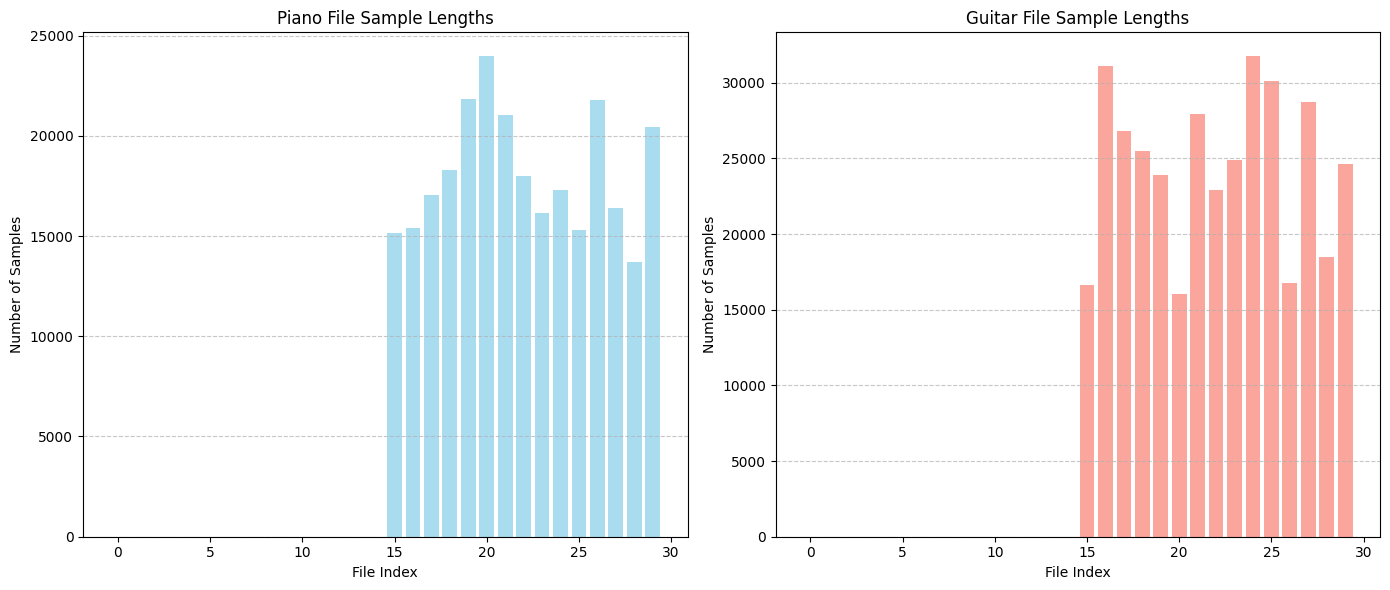

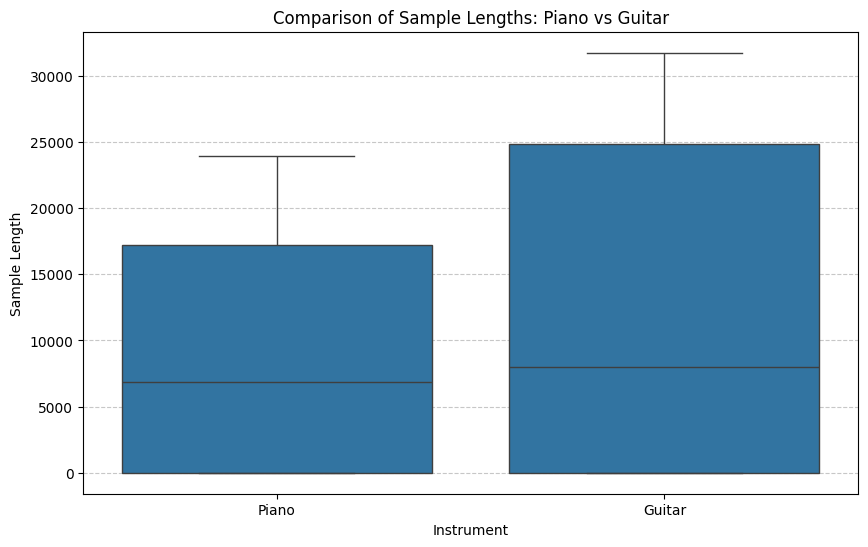

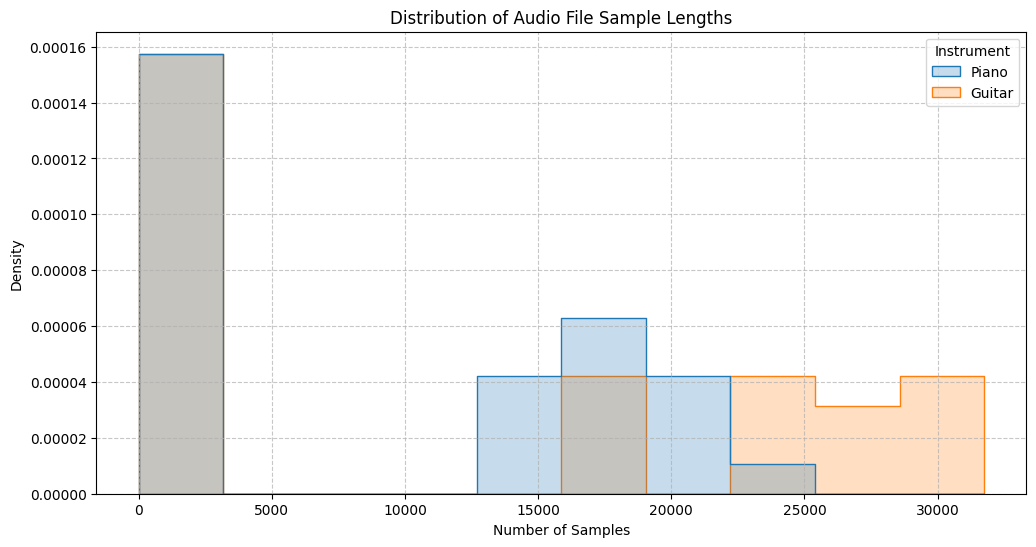

In [18]:
# Loop through piano files
print("Processing piano files...")
for file in os.listdir(piano_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(piano_dir, file)
        try:
            # Load the audio file
            audio, sr = librosa.load(file_path, sr=None)
            # Get the number of samples (length of the audio array)
            sample_length = len(audio)
            piano_lengths.append(sample_length)
            piano_names.append(file)
            print(f"Piano file: {file}, Number of samples: {sample_length}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Loop through guitar files
print("\nProcessing guitar files...")
for file in os.listdir(guitar_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(guitar_dir, file)
        try:
            # Load the audio file
            audio, sr = librosa.load(file_path, sr=None)
            # Get the number of samples (length of the audio array)
            sample_length = len(audio)
            guitar_lengths.append(sample_length)
            guitar_names.append(file)
            print(f"Guitar file: {file}, Number of samples: {sample_length}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Create a DataFrame for visualization
lengths_data = {
    'Filename': piano_names + guitar_names,
    'Sample Length': piano_lengths + guitar_lengths,
    'Instrument': ['Piano'] * len(piano_lengths) + ['Guitar'] * len(guitar_lengths)
}
df_lengths = pd.DataFrame(lengths_data)

# Calculate summary statistics
piano_mean = np.mean(piano_lengths)
guitar_mean = np.mean(guitar_lengths)
piano_std = np.std(piano_lengths)
guitar_std = np.std(guitar_lengths)

print("\nSummary Statistics:")
print(f"Piano files - Average sample length: {piano_mean:.2f}, Standard deviation: {piano_std:.2f}")
print(f"Guitar files - Average sample length: {guitar_mean:.2f}, Standard deviation: {guitar_std:.2f}")

# Create visualizations

# 1. Bar plot of sample lengths
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
bar_positions = np.arange(len(piano_lengths))
plt.bar(bar_positions, piano_lengths, color='skyblue', alpha=0.7)
plt.xlabel('File Index')
plt.ylabel('Number of Samples')
plt.title('Piano File Sample Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
bar_positions = np.arange(len(guitar_lengths))
plt.bar(bar_positions, guitar_lengths, color='salmon', alpha=0.7)
plt.xlabel('File Index')
plt.ylabel('Number of Samples')
plt.title('Guitar File Sample Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Box plot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Instrument', y='Sample Length', data=df_lengths)
plt.title('Comparison of Sample Lengths: Piano vs Guitar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Histogram of sample lengths by instrument
plt.figure(figsize=(12, 6))
sns.histplot(data=df_lengths, x='Sample Length', hue='Instrument',
             element='step', stat='density', common_norm=False, bins=10)
plt.title('Distribution of Audio File Sample Lengths')
plt.xlabel('Number of Samples')
plt.ylabel('Density')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Define categories
CATEGORIES = ["piano", "guitar"]
DATADIR = "./extracted_audio"  # The directory where your zip file was extracted

# Define the output directories
piano_dir = './piano_files'
guitar_dir = './guitar_files'

# Create a storage array for our training data
training_data = []

def create_training_data():
    for category in CATEGORIES:
        print(f"Processing category: {category}")
        class_num = CATEGORIES.index(category)

        # Set the appropriate directory based on category
        category_path = piano_dir if category == "piano" else guitar_dir

        # Check if the category directory exists
        if not os.path.exists(category_path):
            print(f"Warning: Category directory doesn't exist: {category_path}")
            # Try to find files based on patterns instead
            for root, dirs, files in os.walk(DATADIR):
                for file in files:
                    if category in file.lower() and file.endswith('.wav'):
                        process_audio_file(os.path.join(root, file), class_num)
        else:
            # Process each audio file in the category directory
            for audio_file in os.listdir(category_path):
                if audio_file.endswith('.wav'):
                    process_audio_file(os.path.join(category_path, audio_file), class_num)

def process_audio_file(file_path, class_num):
    try:
        # Load audio file using librosa for consistent sample rate
        audio_array, sr_array = librosa.load(file_path, sr=None)


        if len(audio_array) >14400:
            audio_array = audio_array[0:14400]
            print(f"Truncated {file_path} from {len(audio_array)} to n samples")
        elif len(audio_array) < 14400:
            # Pad with zeros if shorter
            padding = np.zeros(14400 - len(audio_array))
            audio_array = np.concatenate((audio_array, padding))
            print(f"Padded {file_path} from {len(audio_array) - len(padding)} to n samples")

        # Append to training data with class number
        training_data.append([audio_array, class_num])

        print(f"Processed {file_path} - Length after processing: {len(audio_array)}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Call the function to process all files
create_training_data()

# Print summary
print(f"\nTotal processed files: {len(training_data)}")
print(f"Piano files: {sum(1 for data in training_data if data[1] == 0)}")
print(f"Guitar files: {sum(1 for data in training_data if data[1] == 1)}")

# Convert to numpy array for further processing (if needed)
import random
random.shuffle(training_data)  # Shuffle to mix categories

# Separate features and labels
X = []  # Features (audio data)
y = []  # Labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

print(f"\nData shape: X={X.shape}, y={y.shape}")
print("Data is ready for model training!")

Processing category: piano
Truncated ./piano_files/piano_1.wav from 14400 to n samples
Processed ./piano_files/piano_1.wav - Length after processing: 14400
Truncated ./piano_files/piano_15.wav from 14400 to n samples
Processed ./piano_files/piano_15.wav - Length after processing: 14400
Truncated ./piano_files/piano_11.wav from 14400 to n samples
Processed ./piano_files/piano_11.wav - Length after processing: 14400
Truncated ./piano_files/piano_9.wav from 14400 to n samples
Processed ./piano_files/piano_9.wav - Length after processing: 14400
Truncated ./piano_files/piano_12.wav from 14400 to n samples
Processed ./piano_files/piano_12.wav - Length after processing: 14400
Truncated ./piano_files/piano_3.wav from 14400 to n samples
Processed ./piano_files/piano_3.wav - Length after processing: 14400
Truncated ./piano_files/piano_6.wav from 14400 to n samples
Processed ./piano_files/piano_6.wav - Length after processing: 14400
Truncated ./piano_files/piano_8.wav from 14400 to n samples
Proc

In [20]:
# Calculate the number of audio files
lenofaudio = len(X)

# Stack all arrays in the first dimension
X = np.vstack(X)

# Reshape to have each audio file as a separate sample
X = np.array(X).reshape(lenofaudio, -1)
X.shape

(30, 14400)

In [21]:
reshape = np.shape(X)


In [22]:
data1 = X[0:14400]

In [25]:
reshaped_data = data1.reshape(30,2,80,90)

Created directory: generated_images
Saved: generated_images/image_1_channel_1.png


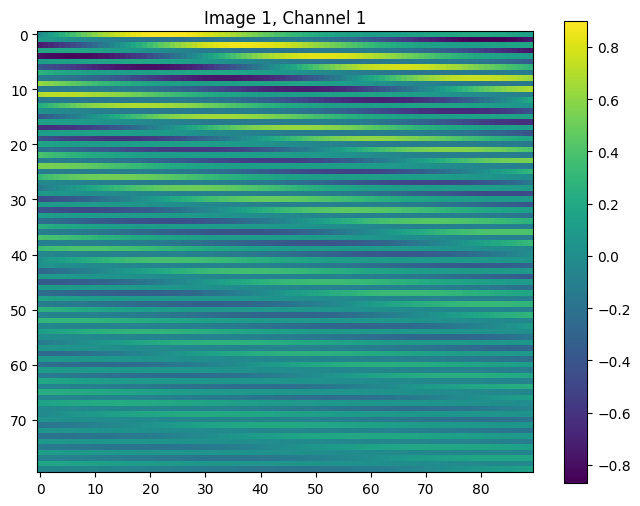

Saved: generated_images/image_1_channel_2.png


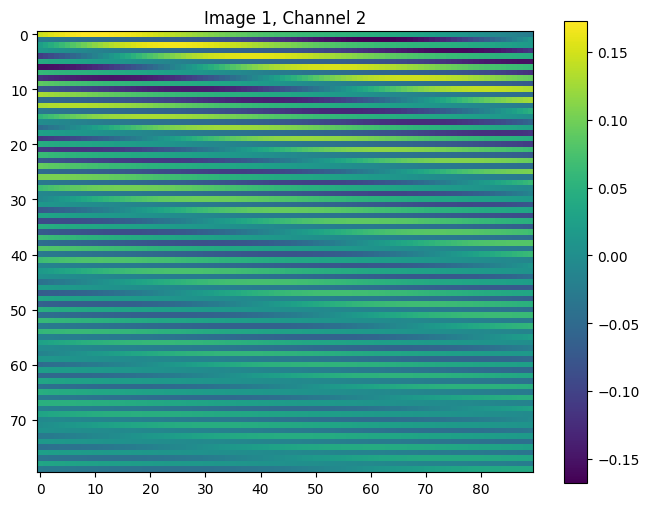

Saved: generated_images/image_2_channel_1.png


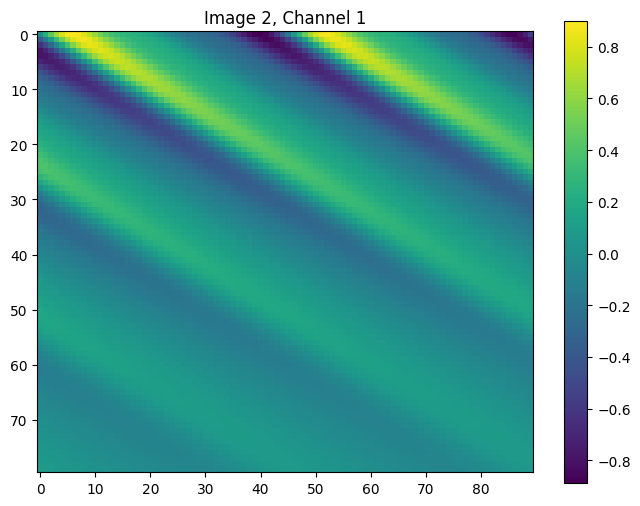

Saved: generated_images/image_2_channel_2.png


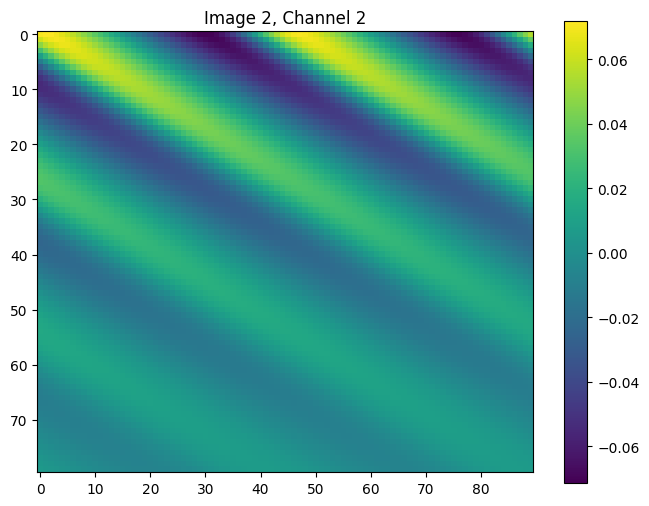

Saved: generated_images/image_3_channel_1.png


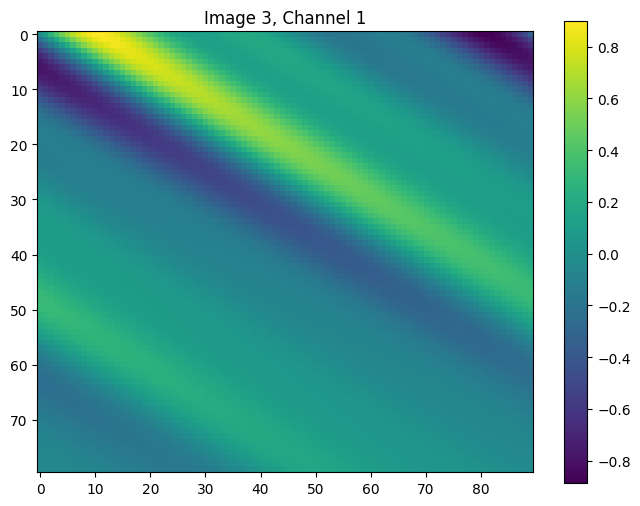

Saved: generated_images/image_3_channel_2.png


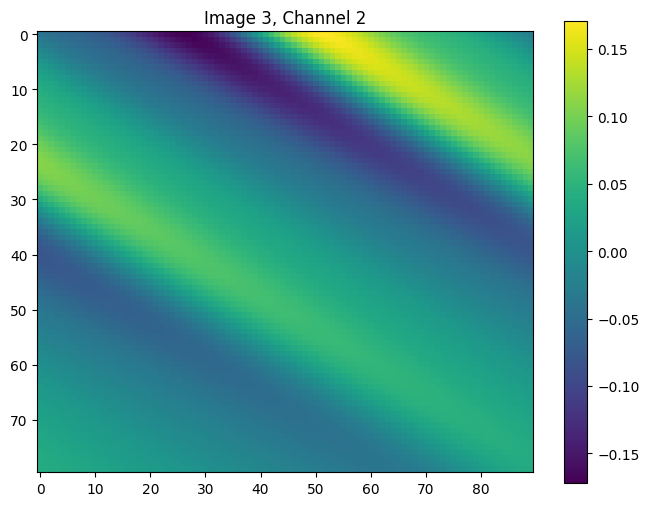

Saved: generated_images/image_4_channel_1.png


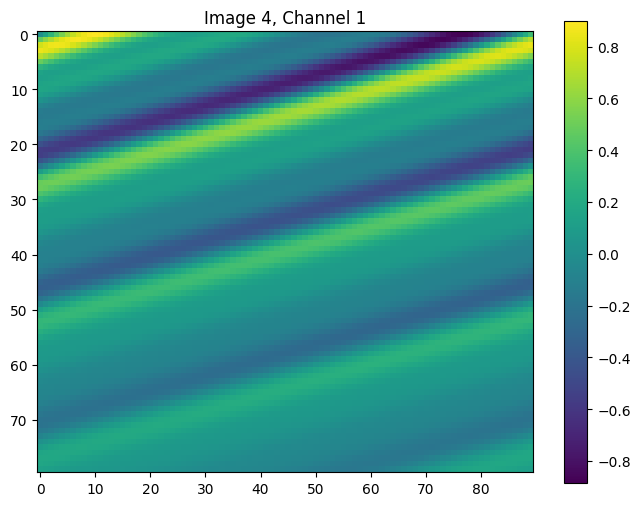

Saved: generated_images/image_4_channel_2.png


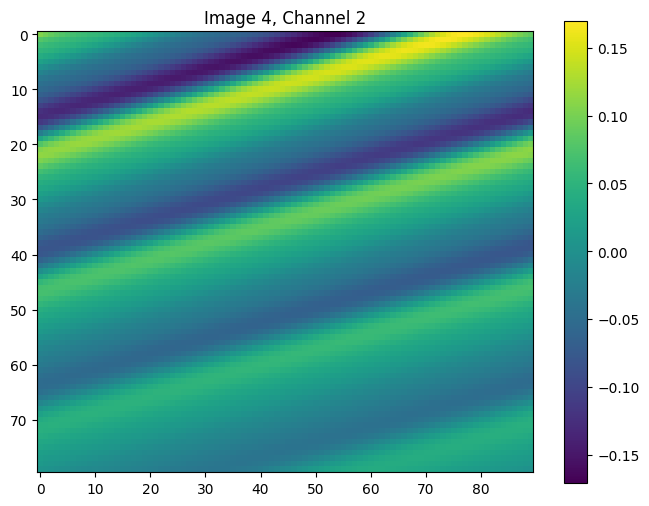

Saved: generated_images/image_5_channel_1.png


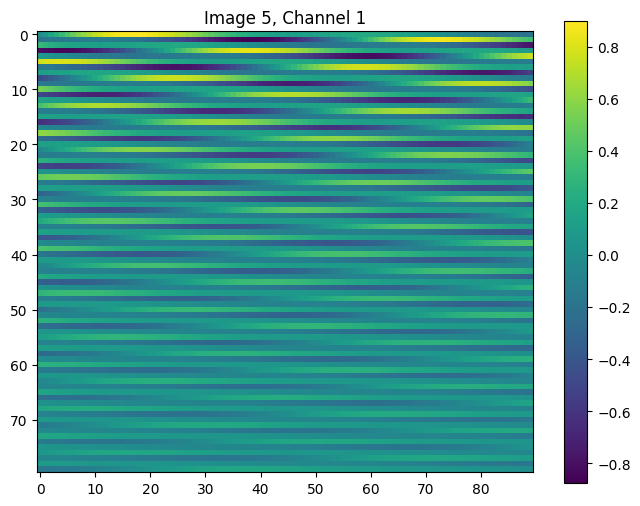

Saved: generated_images/image_5_channel_2.png


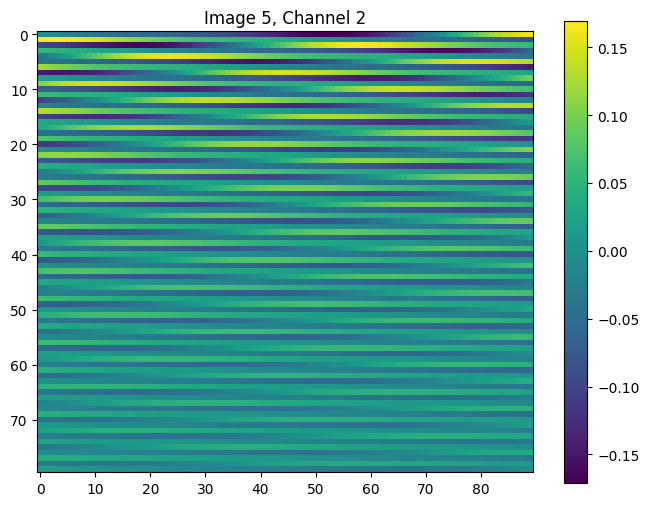

Saved: generated_images/image_6_channel_1.png


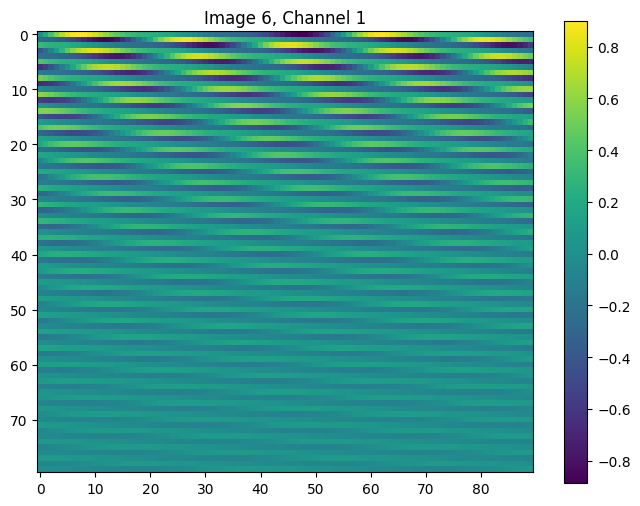

Saved: generated_images/image_6_channel_2.png


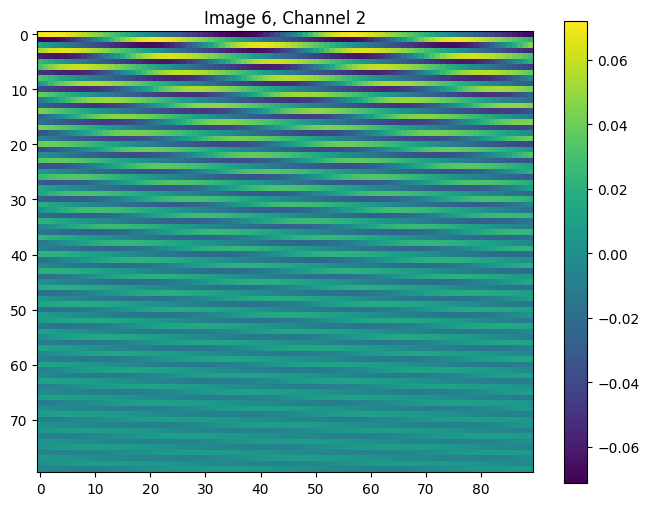

Saved: generated_images/image_7_channel_1.png


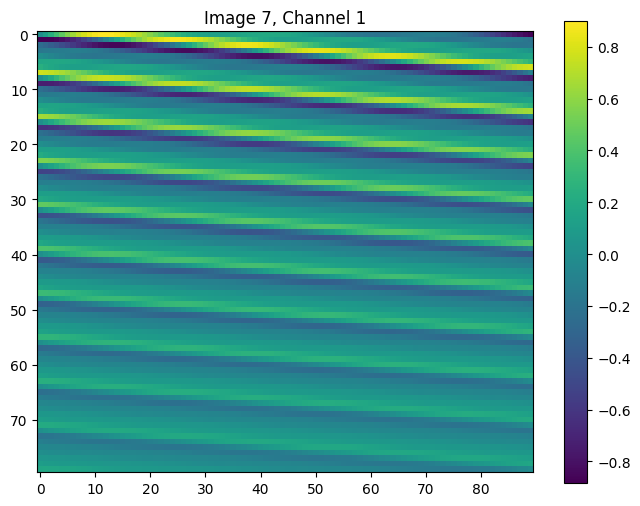

Saved: generated_images/image_7_channel_2.png


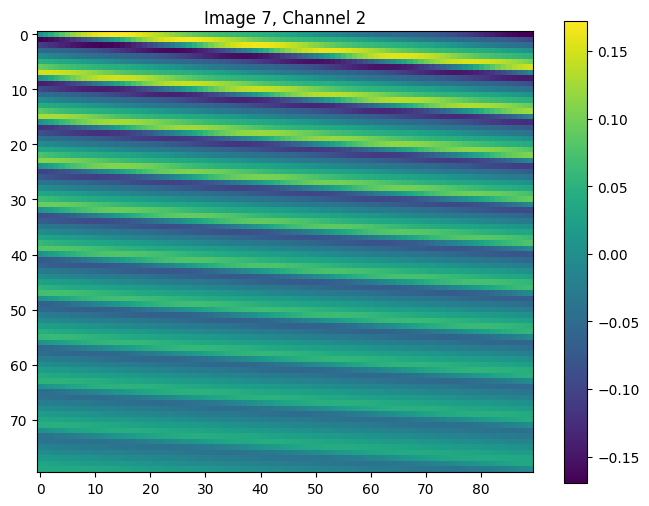

Saved: generated_images/image_8_channel_1.png


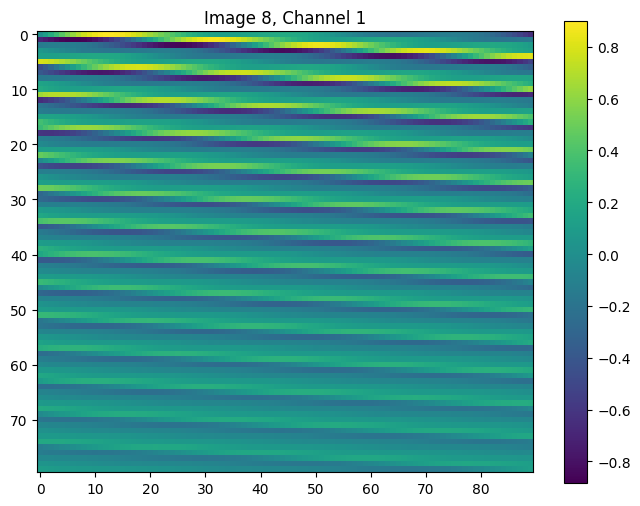

Saved: generated_images/image_8_channel_2.png


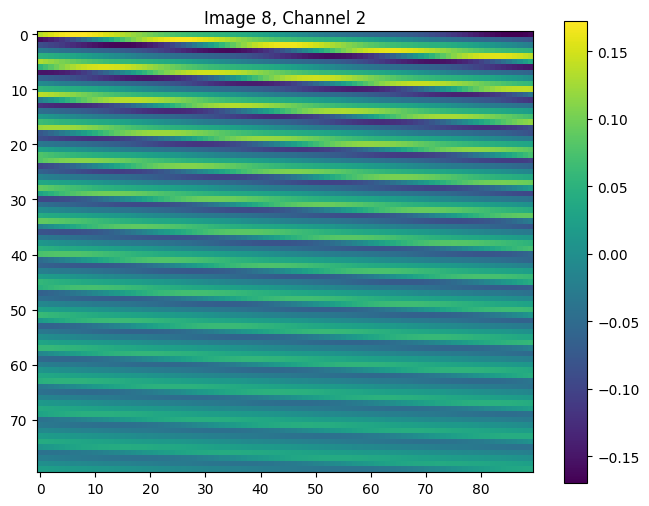

Saved: generated_images/image_9_channel_1.png


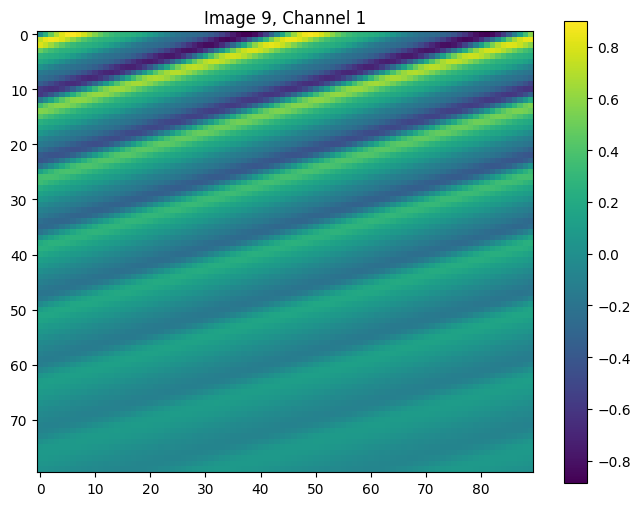

Saved: generated_images/image_9_channel_2.png


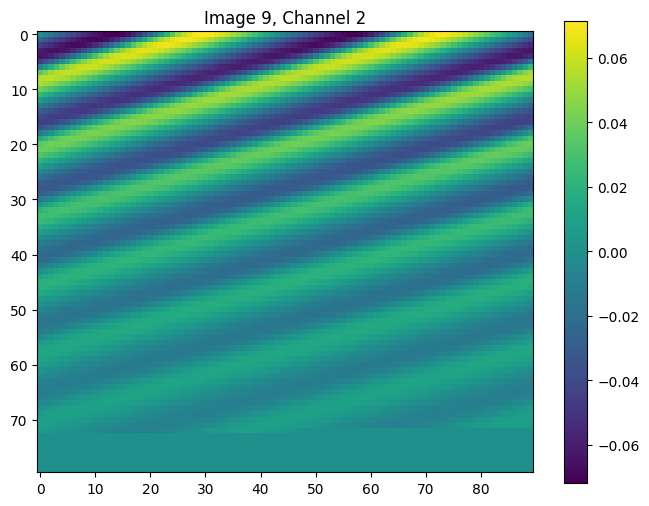

Saved: generated_images/image_10_channel_1.png


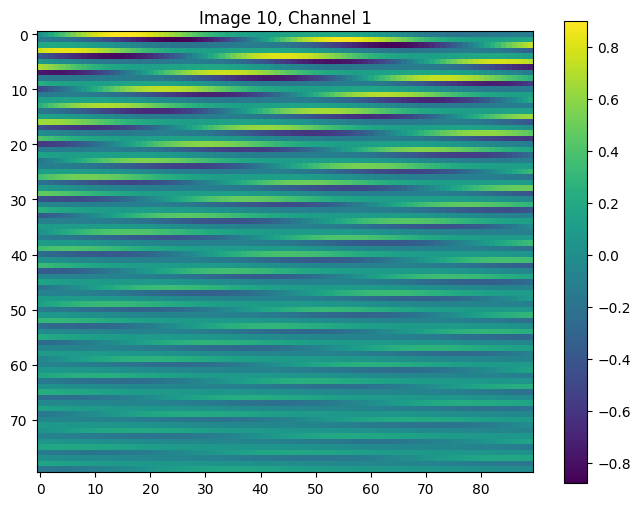

Saved: generated_images/image_10_channel_2.png


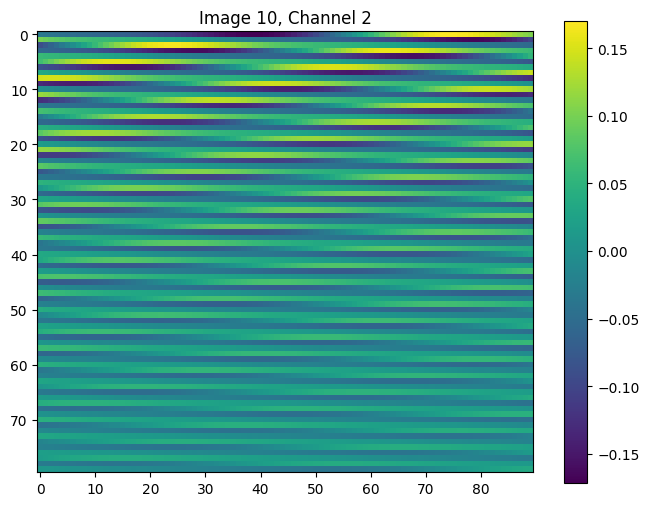

Saved: generated_images/image_11_channel_1.png


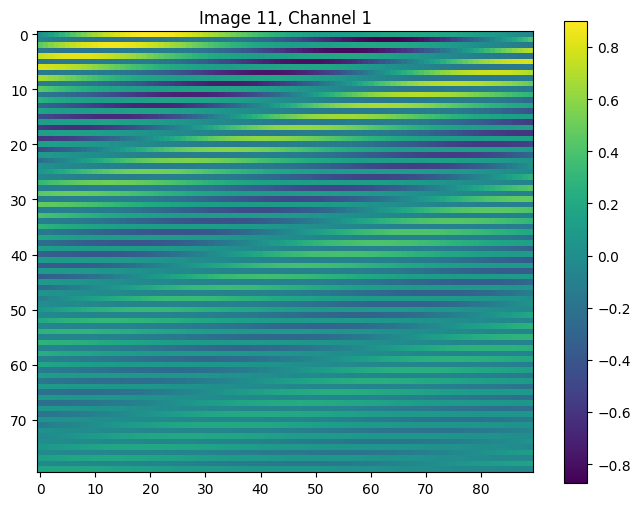

Saved: generated_images/image_11_channel_2.png


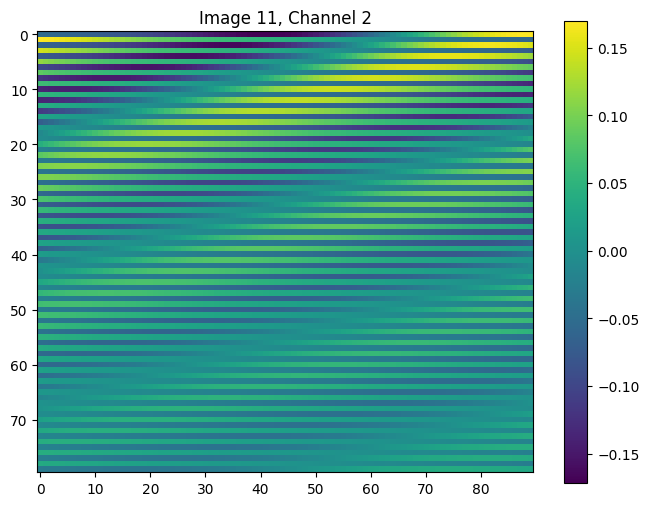

Saved: generated_images/image_12_channel_1.png


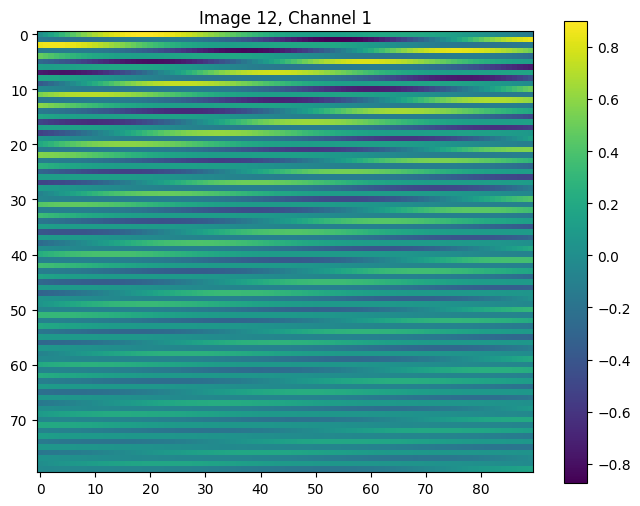

Saved: generated_images/image_12_channel_2.png


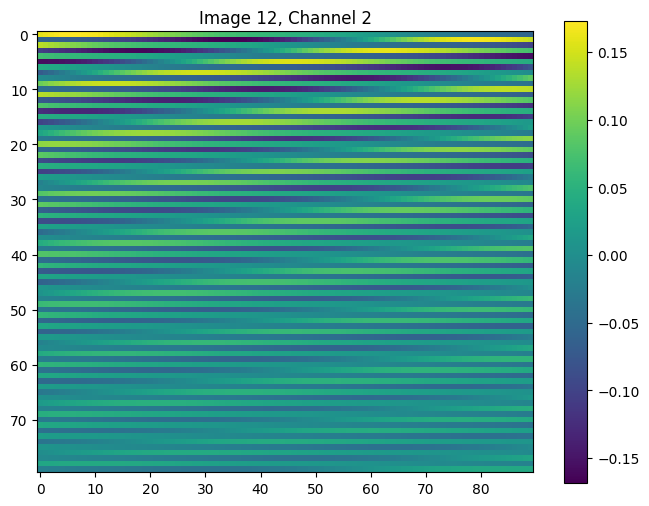

Saved: generated_images/image_13_channel_1.png


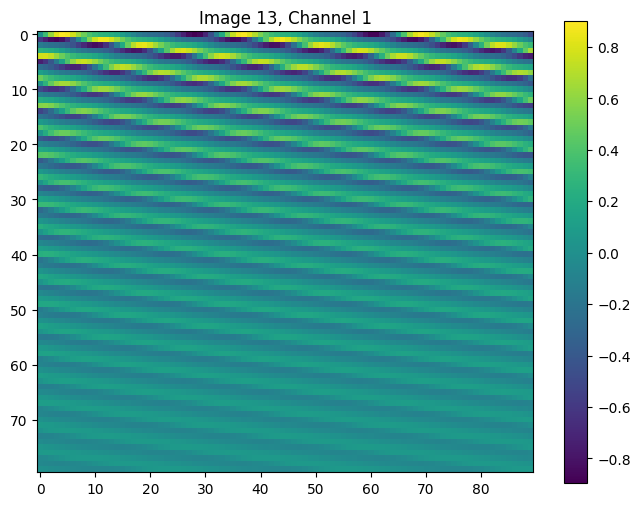

Saved: generated_images/image_13_channel_2.png


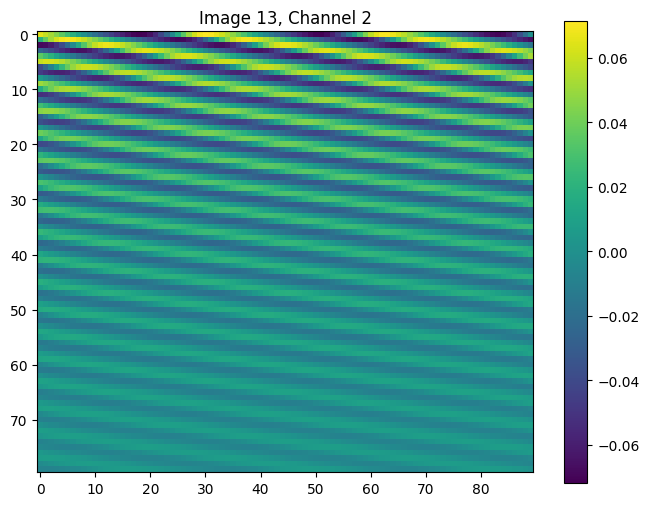

Saved: generated_images/image_14_channel_1.png


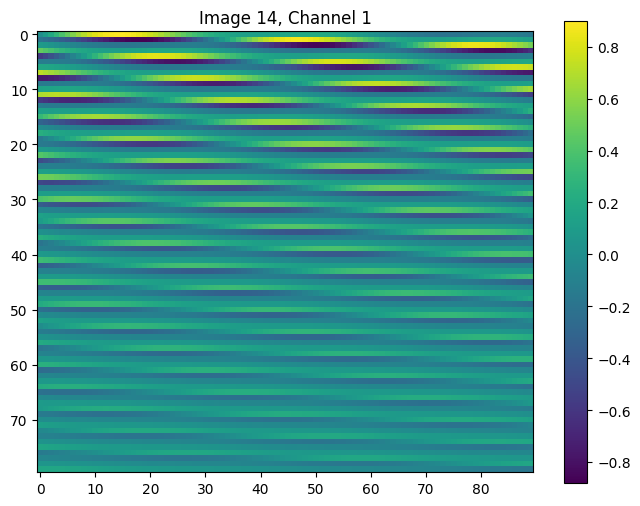

Saved: generated_images/image_14_channel_2.png


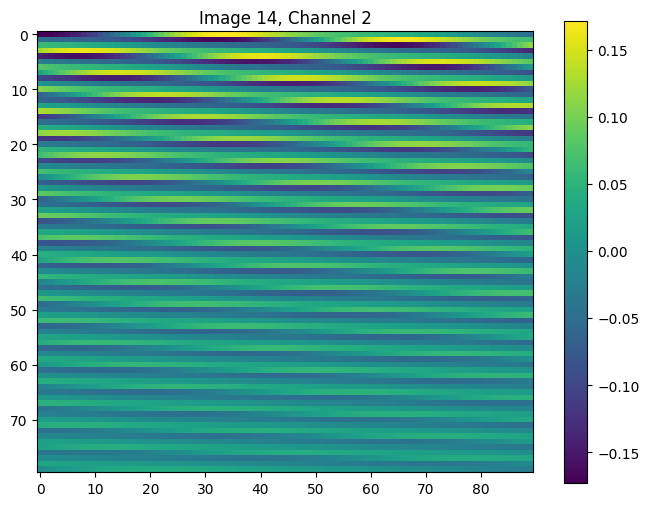

Saved: generated_images/image_15_channel_1.png


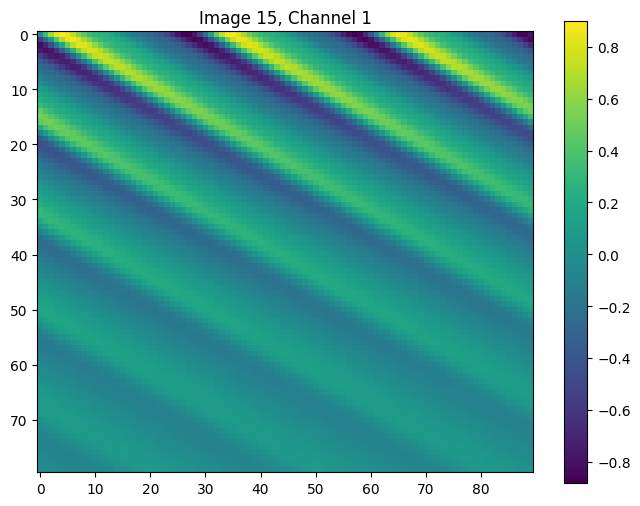

Saved: generated_images/image_15_channel_2.png


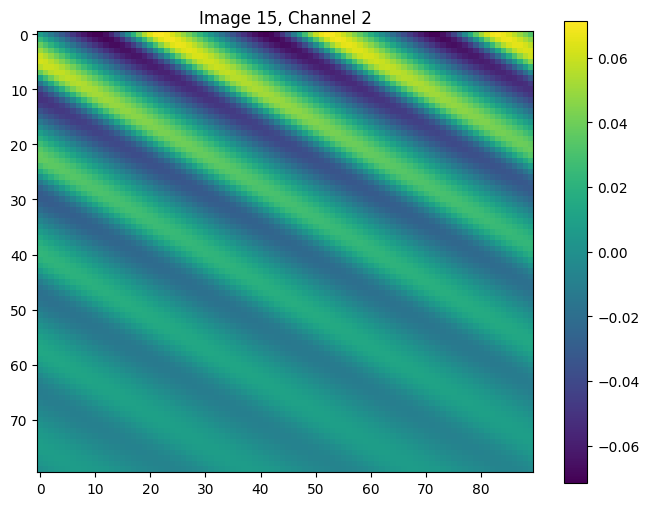

Saved: generated_images/image_16_channel_1.png


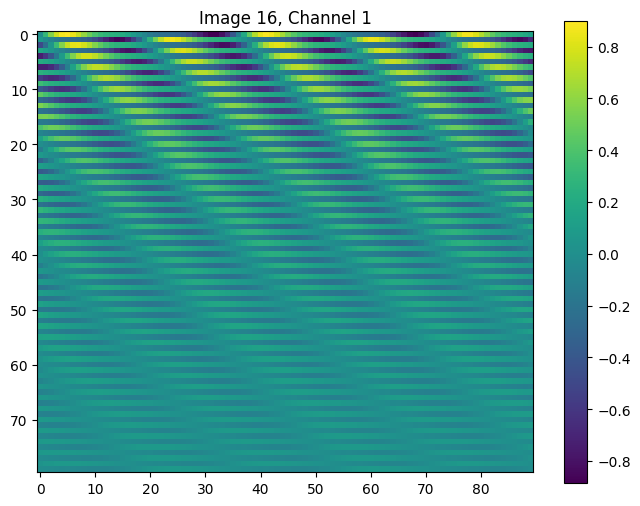

Saved: generated_images/image_16_channel_2.png


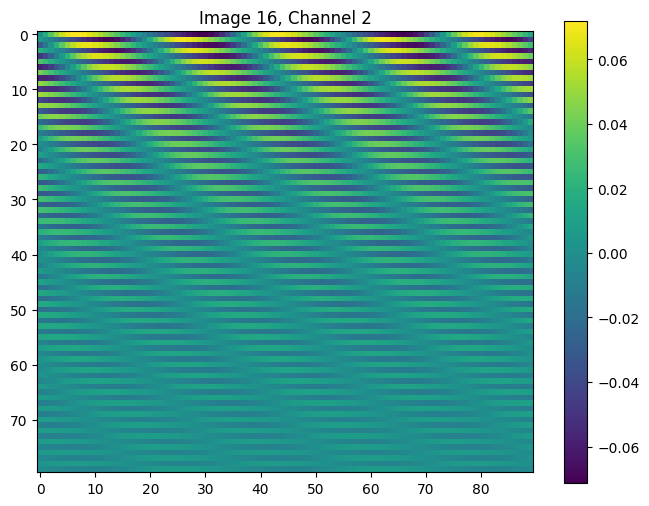

Saved: generated_images/image_17_channel_1.png


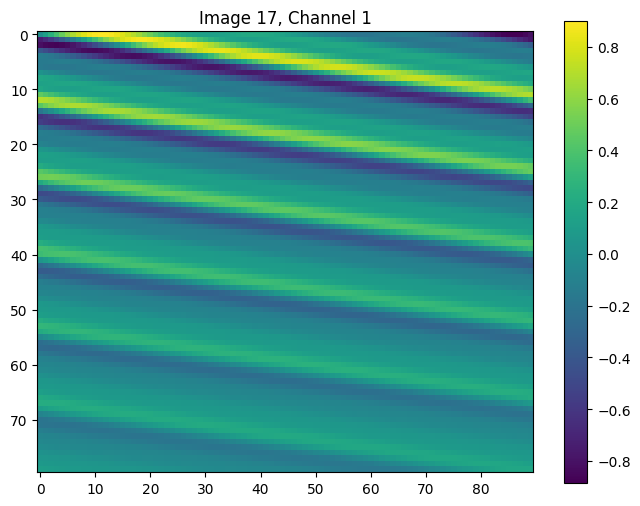

Saved: generated_images/image_17_channel_2.png


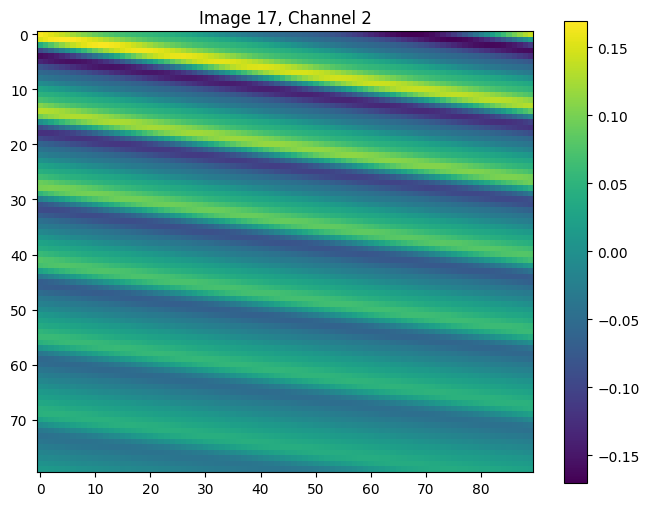

Saved: generated_images/image_18_channel_1.png


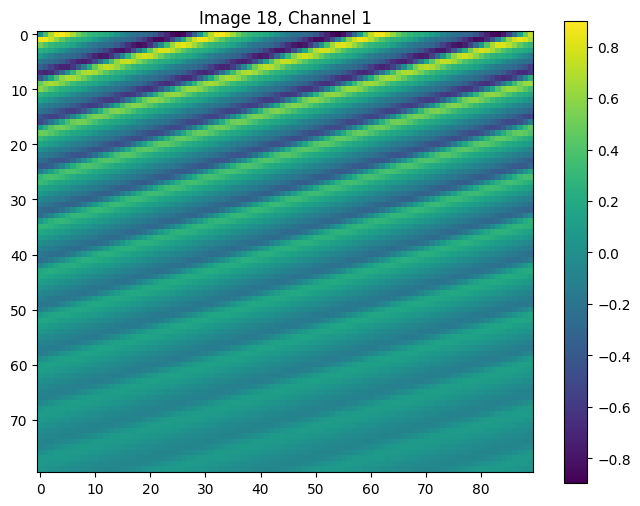

Saved: generated_images/image_18_channel_2.png


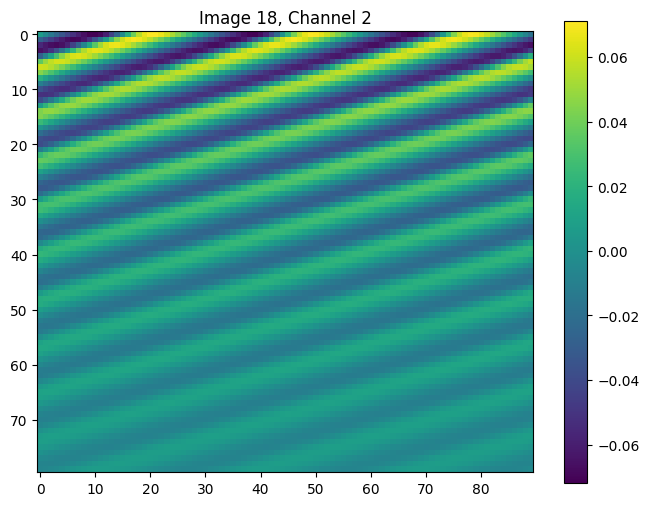

Saved: generated_images/image_19_channel_1.png


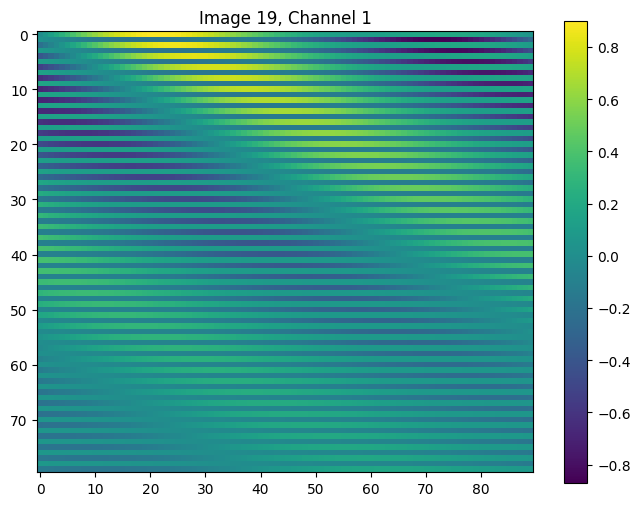

Saved: generated_images/image_19_channel_2.png


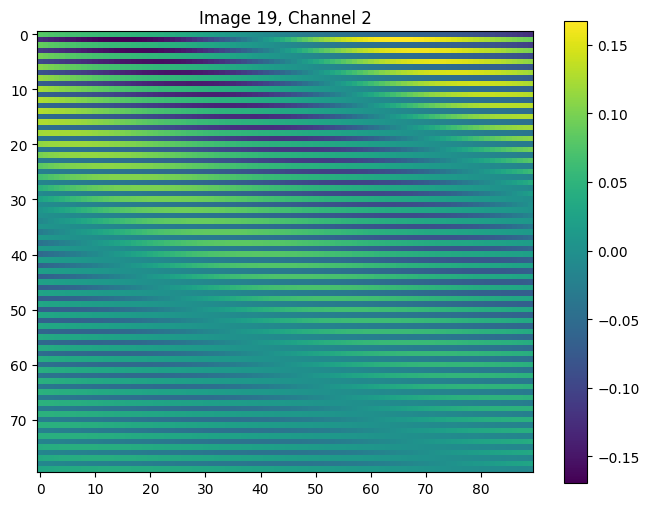

Saved: generated_images/image_20_channel_1.png


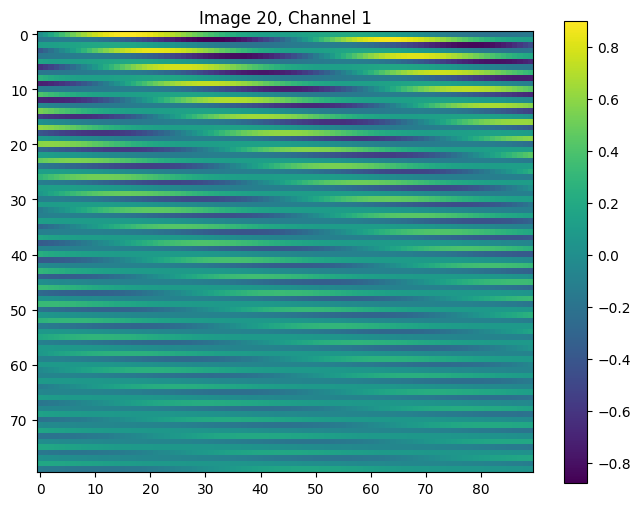

Saved: generated_images/image_20_channel_2.png


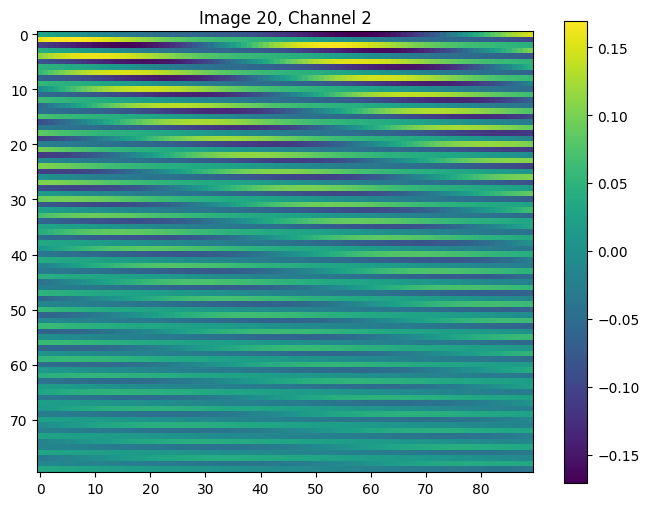

Saved: generated_images/image_21_channel_1.png


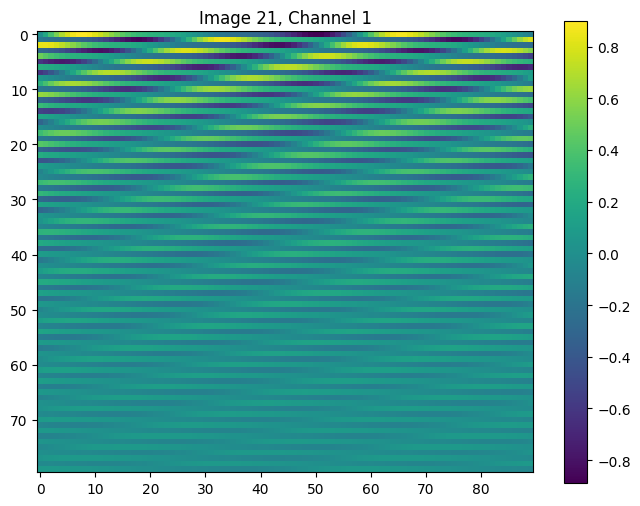

Saved: generated_images/image_21_channel_2.png


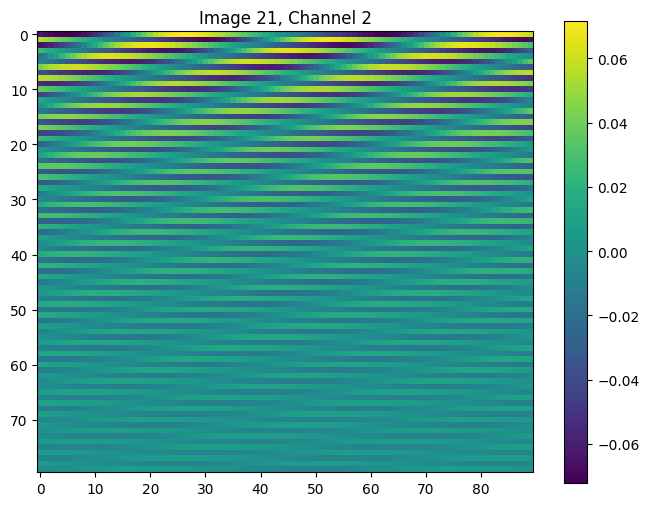

Saved: generated_images/image_22_channel_1.png


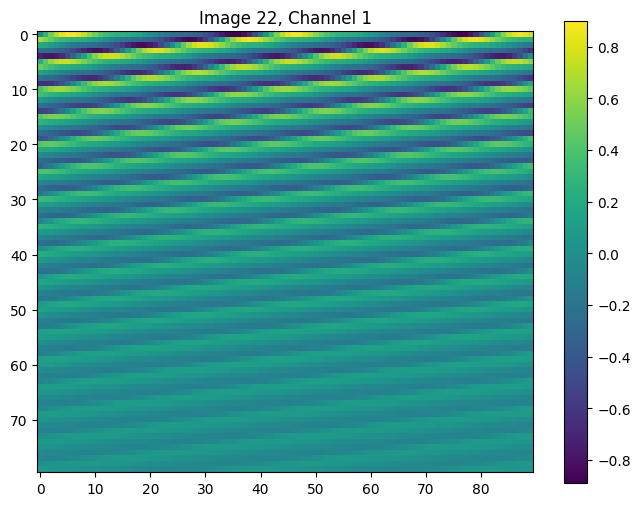

Saved: generated_images/image_22_channel_2.png


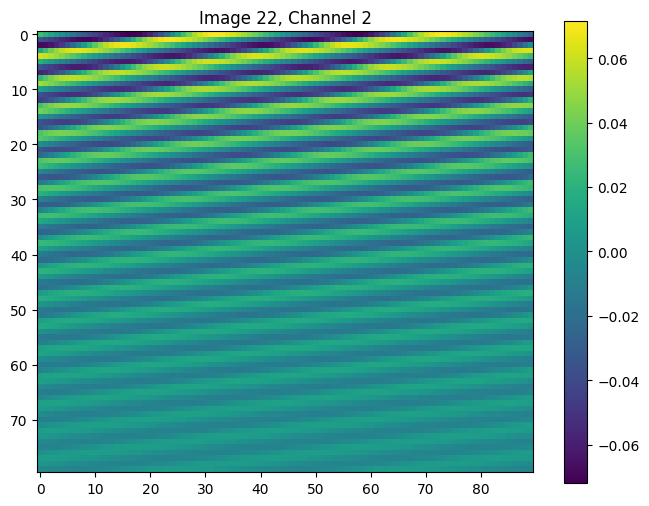

Saved: generated_images/image_23_channel_1.png


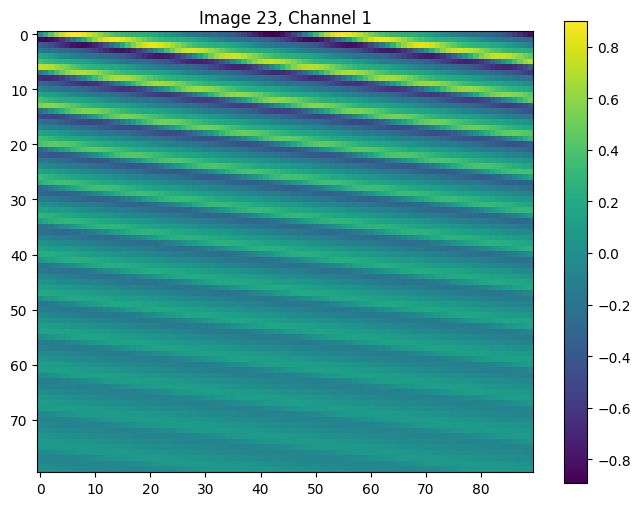

Saved: generated_images/image_23_channel_2.png


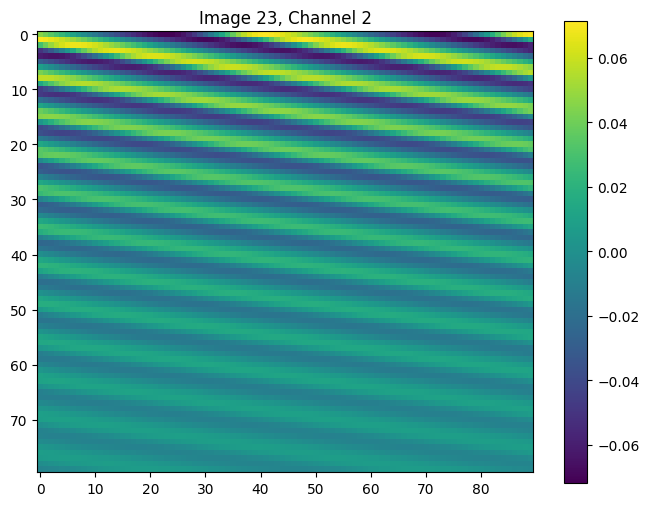

Saved: generated_images/image_24_channel_1.png


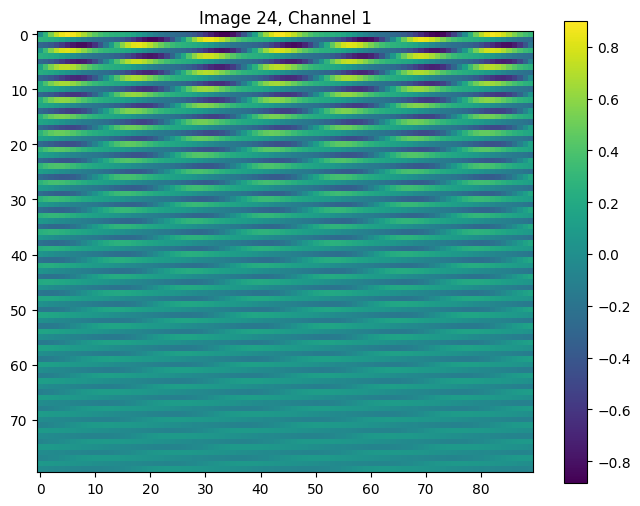

Saved: generated_images/image_24_channel_2.png


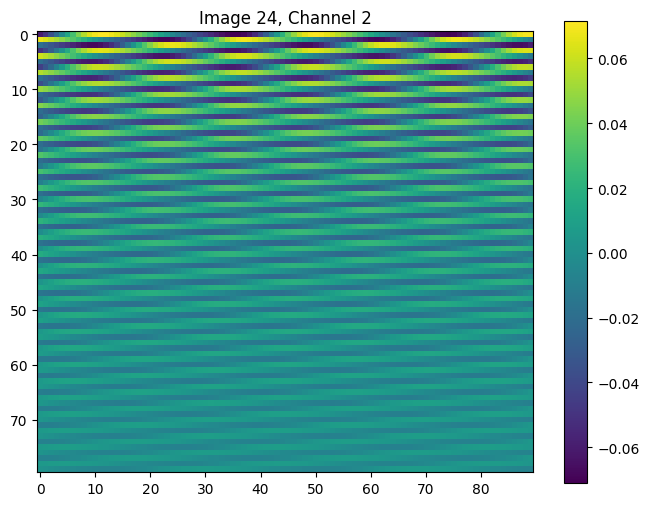

Saved: generated_images/image_25_channel_1.png


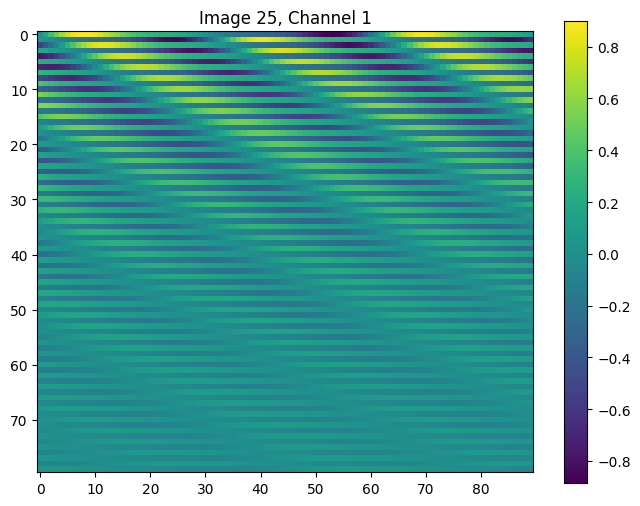

Saved: generated_images/image_25_channel_2.png


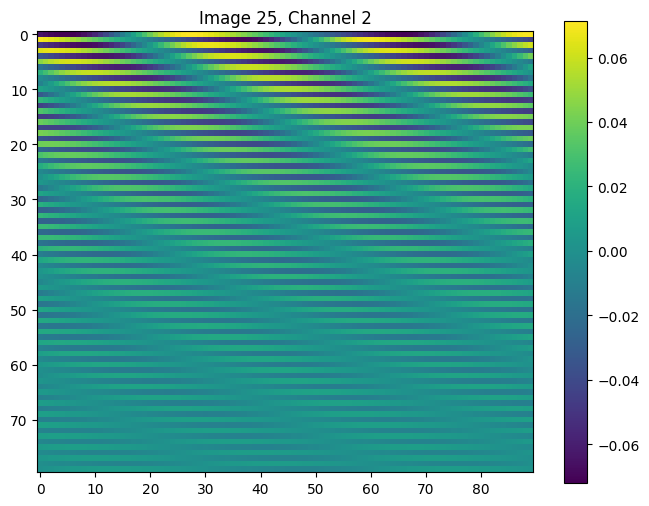

Saved: generated_images/image_26_channel_1.png


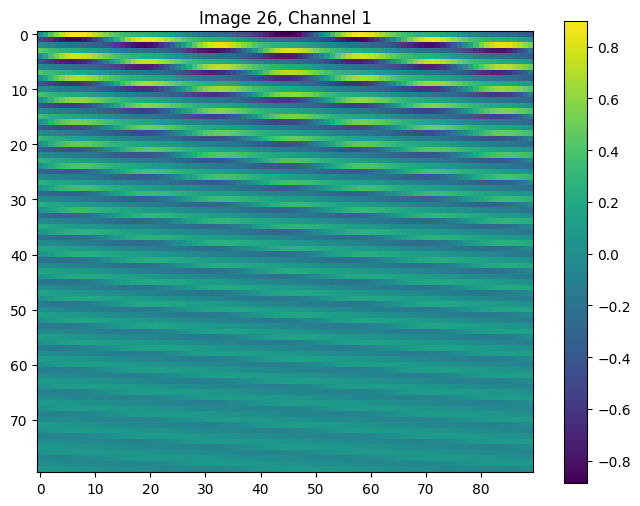

Saved: generated_images/image_26_channel_2.png


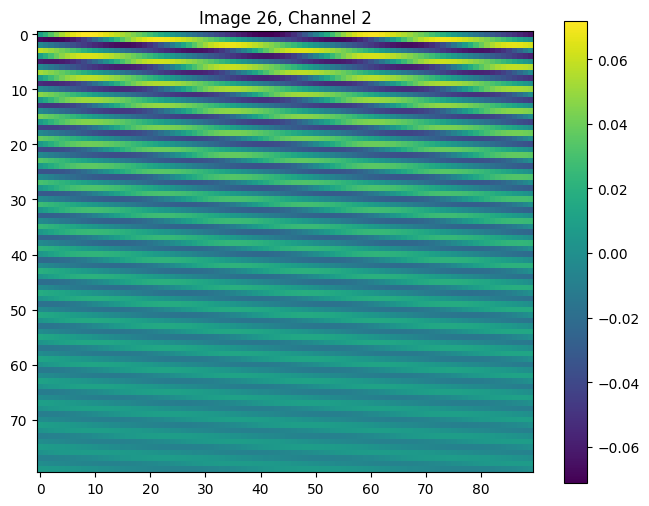

Saved: generated_images/image_27_channel_1.png


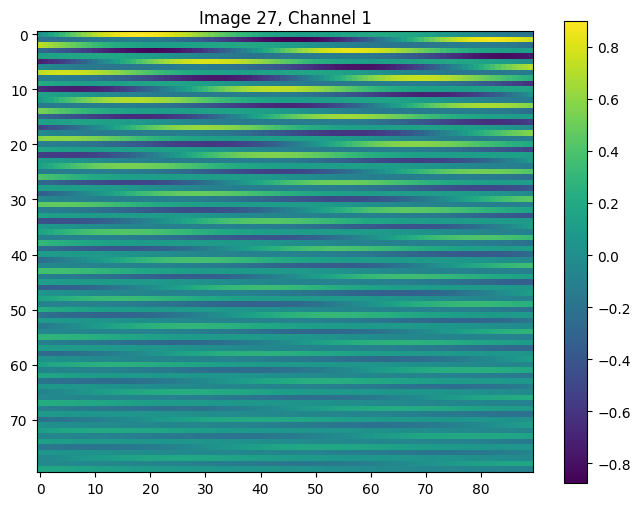

Saved: generated_images/image_27_channel_2.png


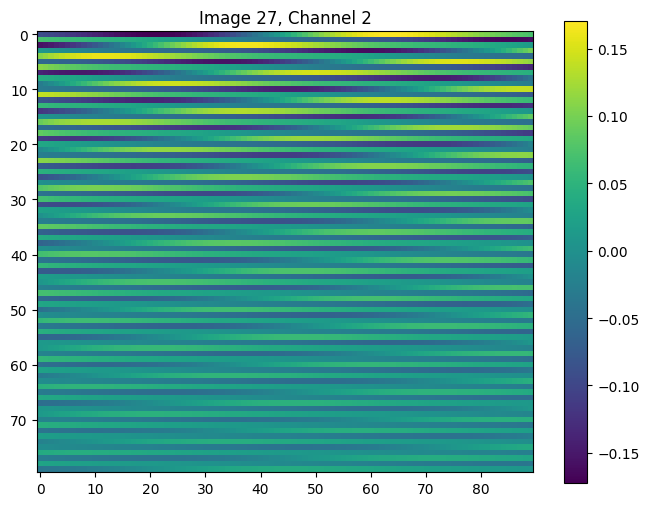

Saved: generated_images/image_28_channel_1.png


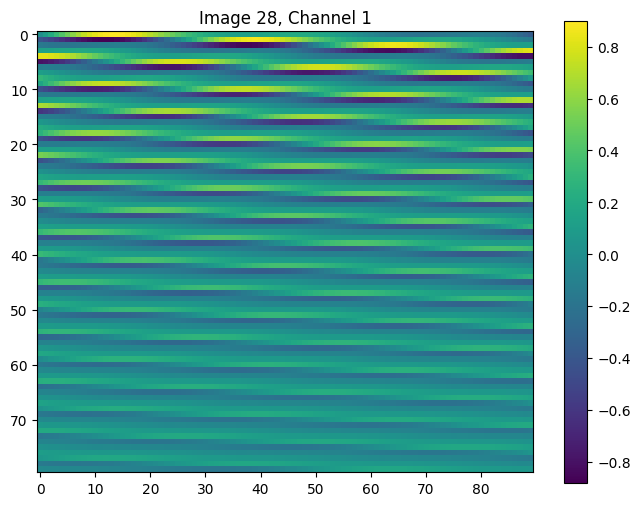

Saved: generated_images/image_28_channel_2.png


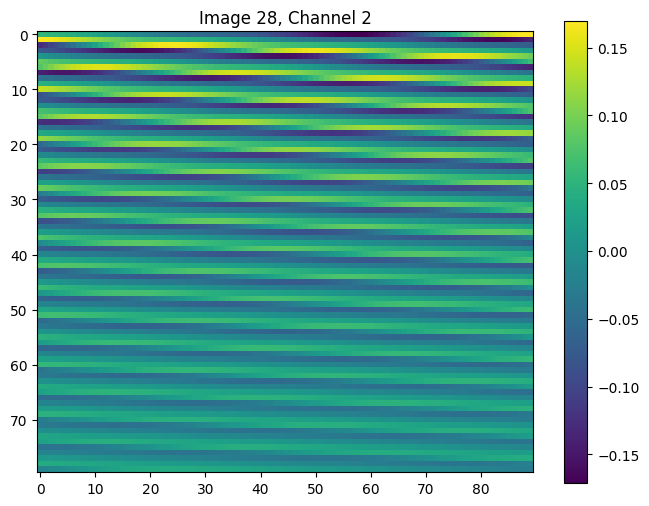

Saved: generated_images/image_29_channel_1.png


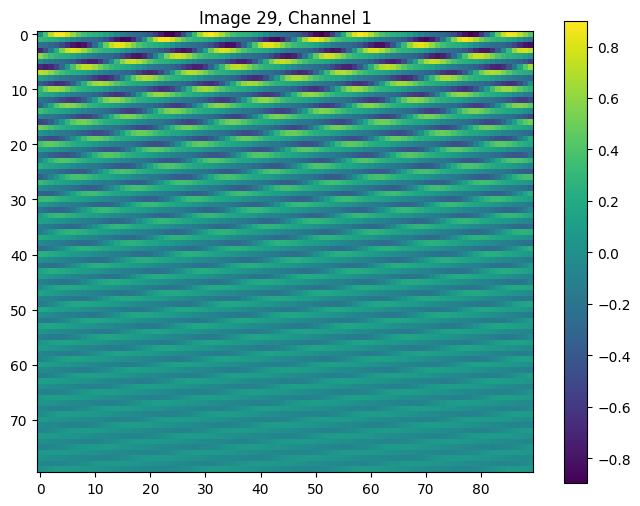

Saved: generated_images/image_29_channel_2.png


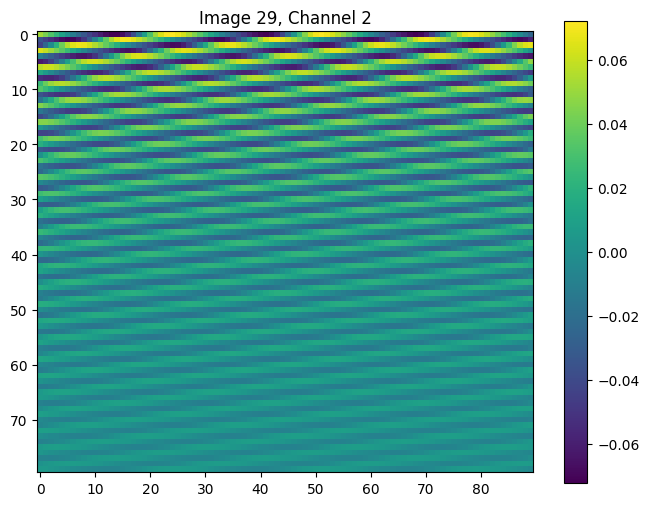

Saved: generated_images/image_30_channel_1.png


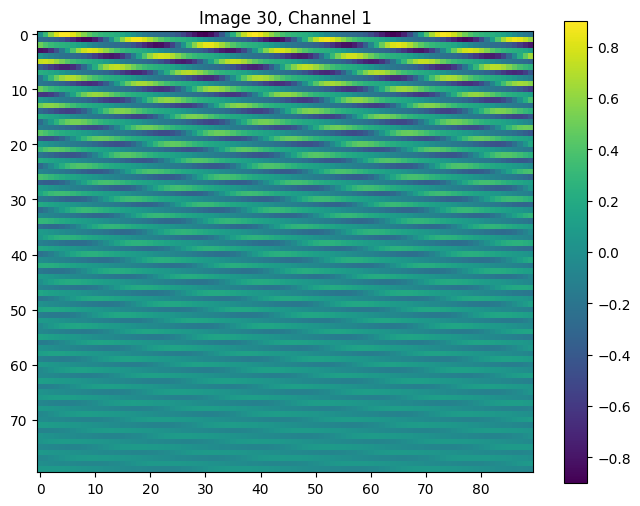

Saved: generated_images/image_30_channel_2.png


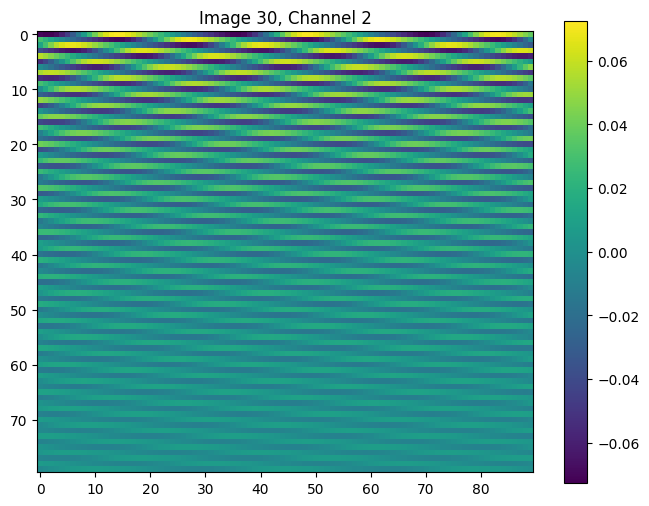

All images saved to the 'generated_images' directory


In [26]:
# Create a directory to save the images
output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
print(f"Created directory: {output_dir}")

# Loop through each image, display it in color, and save it
for i in range(reshaped_data.shape[0]):
    for j in range(reshaped_data.shape[1]):  # Iterate through the second dimension
        # Create a figure with specific size for better quality saved images
        plt.figure(figsize=(8, 6), dpi=100)

        # Display the image in color
        img = plt.imshow(reshaped_data[i, j])  # No cmap='gray' for color display

        plt.title(f"Image {i + 1}, Channel {j + 1}")
        plt.colorbar()  # Add a colorbar

        # Create a filename for saving
        filename = f"image_{i+1}_channel_{j+1}.png"
        filepath = os.path.join(output_dir, filename)

        # Save the figure to the file
        plt.savefig(filepath, bbox_inches='tight')
        print(f"Saved: {filepath}")

        # Show the image (optional - you can comment this out to avoid displaying)
        plt.show()

        # Close the figure to free memory
        plt.close()

print(f"All images saved to the '{output_dir}' directory")

In [27]:
from google.colab import files as colab_files  # Renamed to avoid conflicts

# Define the folder to zip
folder_to_zip = "generated_images"

# Create a zip file containing all images
zip_filename = "generated_images.zip"

print(f"Creating zip file of all images...")
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(folder_to_zip):
        for file in files:
            file_path = os.path.join(root, file)
            # Calculate path inside the zip file
            arcname = os.path.relpath(file_path, os.path.dirname(folder_to_zip))
            zipf.write(file_path, arcname=arcname)
            print(f"Added to zip: {file_path}")

print(f"Zip file '{zip_filename}' created with {len(os.listdir(folder_to_zip))} images")

# Download the zip file to your local computer
print("Starting download... (this may take a while depending on the number and size of images)")
colab_files.download(zip_filename)  # Using the renamed import
print("Download initiated. Check your browser's download manager if it doesn't start automatically.")


Creating zip file of all images...
Added to zip: generated_images/image_13_channel_2.png
Added to zip: generated_images/image_12_channel_1.png
Added to zip: generated_images/image_1_channel_2.png
Added to zip: generated_images/image_22_channel_2.png
Added to zip: generated_images/image_26_channel_2.png
Added to zip: generated_images/image_18_channel_1.png
Added to zip: generated_images/image_7_channel_2.png
Added to zip: generated_images/image_29_channel_1.png
Added to zip: generated_images/image_29_channel_2.png
Added to zip: generated_images/image_11_channel_1.png
Added to zip: generated_images/image_15_channel_1.png
Added to zip: generated_images/image_2_channel_1.png
Added to zip: generated_images/image_6_channel_2.png
Added to zip: generated_images/image_23_channel_2.png
Added to zip: generated_images/image_7_channel_1.png
Added to zip: generated_images/image_28_channel_2.png
Added to zip: generated_images/image_27_channel_2.png
Added to zip: generated_images/image_16_channel_2.pn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated. Check your browser's download manager if it doesn't start automatically.


In [ ]:
################## End